# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
488,72,79.05,5730.7,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic),0
1061,55,76.25,4154.55,Female,1,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Electronic check,0
1987,41,78.35,3211.2,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),0
4380,1,24.80,24.8,Female,1,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
3700,17,51.50,900.5,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,1


In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

cool, nan'ов нет...

In [8]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x :  np.NAN if x == ' ' else float(x))
data.dropna(inplace=True)

In [9]:
df_num = data[num_cols]
df_cat = data[cat_cols]
data.shape


(5273, 20)

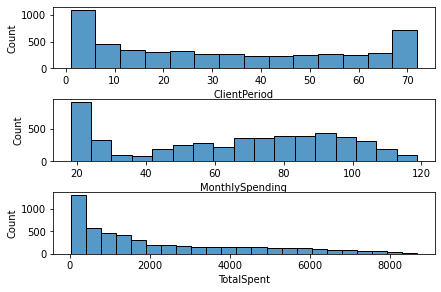

In [10]:
fig, ax = plt.subplots(len(df_num.columns))
fig.tight_layout(pad=1.0)
for i, col in enumerate(df_num.columns):
    sns.histplot(ax=ax[i], data=df_num[col])
plt.show()

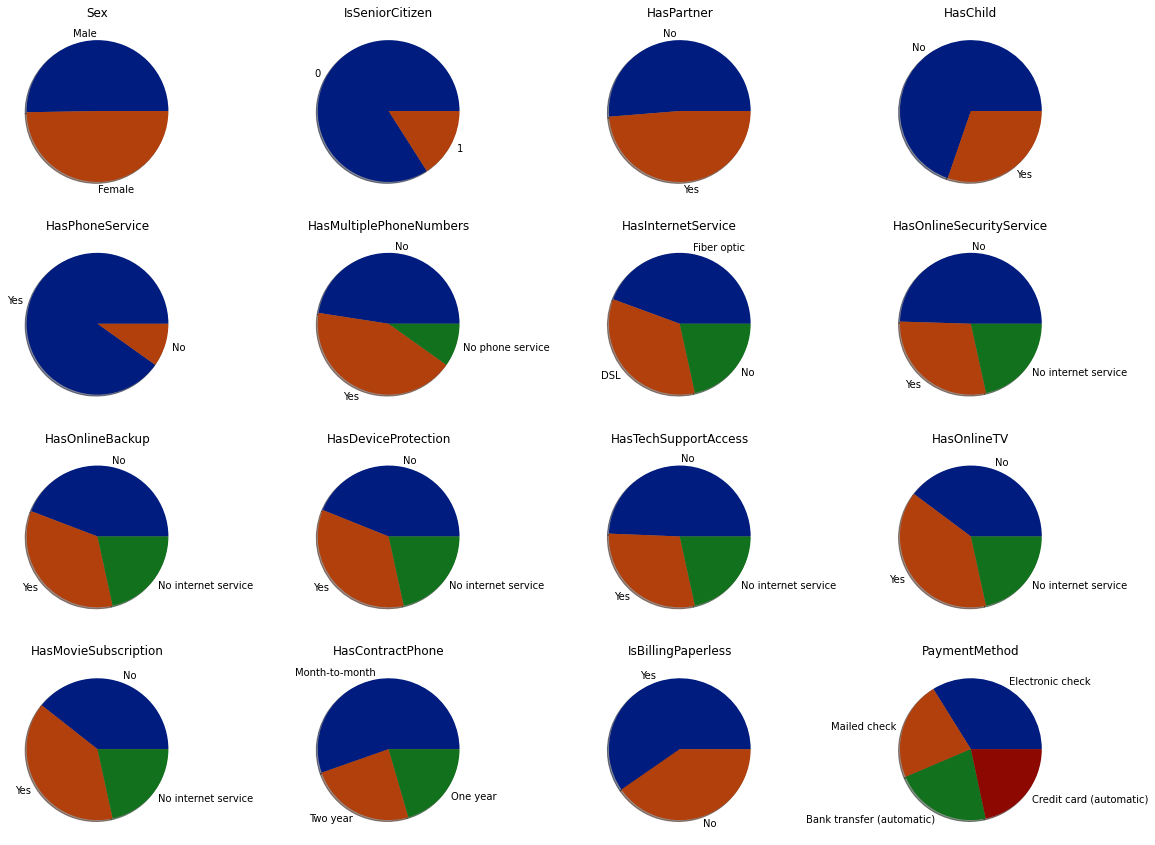

In [11]:
fig, ax = plt.subplots(len(cat_cols) // 4, 4)
fig.set_size_inches(20, 15)
colors = sns.color_palette('dark')
for i in range(len(cat_cols)):
    data_vals = data[cat_cols[i]].value_counts()
    plot_idx = ax[i // 4, i % 4]
    plot_idx.pie(data_vals, labels = data_vals.index, shadow = True, colors=colors)
    plot_idx.title.set_text(cat_cols[i])

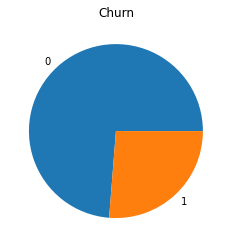

In [12]:
plt.pie(data[target_col].value_counts(), labels=data[target_col].value_counts().index)
plt.title(target_col)
plt.show()


Классы являются несбалансированными

## Линейная модель

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.metrics import roc_curve


In [14]:
import warnings
warnings.filterwarnings('ignore')

ct = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_cols),
    ("num", StandardScaler(), num_cols)
])


pipe = Pipeline([
    ('transform', ct)
])

grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1, 0.1, 0.01, 0.001]
}

clf = Pipeline([
    ('data trans', pipe), 
    ('grid', GridSearchCV(LogisticRegression(max_iter=10000, solver='saga', l1_ratio=0.5), param_grid=grid, cv=5, refit=True))
])


X = data[feature_cols]
y = data[target_col]

clf.fit(X, y)


Pipeline(steps=[('data trans',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(),
                                                                   ['Sex',
                                                                    'IsSeniorCitizen',
                                                                    'HasPartner',
                                                                    'HasChild',
                                                                    'HasPhoneService',
                                                                    'HasMultiplePhoneNumbers',
                                                                    'HasInternetService',
                                                                    'HasOnlineSecurityService',
                                                                    'HasOnlineBackup',
                                                                    'HasDeviceProtection',
                                                                    'HasTechSupportAccess',
                                                                    'HasOnlineTV',
                                                                    'HasMovieSubscription',
                                                                    'HasContractPhone',
                                                                    'IsBillingPaperless',
                                                                    'PaymentMethod']),
                                                                  ('num',
                                                                   StandardScaler(),
                                                                   ['ClientPeriod',
                                                                    'MonthlySpending',
                                                                    'TotalSpent'])]))])),
                ('grid',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(l1_ratio=0.5,
                                                           max_iter=10000,
                                                           solver='saga'),
                              param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                                          'penalty': ['l1', 'l2',
                                                      'elasticnet']}))])

In [15]:
best_model = clf.named_steps['grid'].best_estimator_

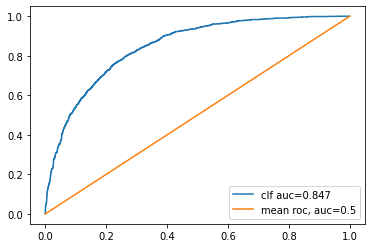

In [16]:
y_pred = clf.predict_proba(X)[:, 1]
y_mean = np.full_like(y, fill_value=y.mean())

fpr, tpr, _ = roc_curve(y, y_pred)
auc = round(roc_auc_score(y, y_pred), 3)
plt.plot(fpr, tpr, label="clf auc="+str(auc))



fpr, tpr, _ = roc_curve(y, y_mean)
auc = round(roc_auc_score(y, y_mean), 3)
plt.plot(fpr, tpr, label="mean roc, auc="+str(auc))


plt.legend()
plt.show()

Внимание проверяющим, нет train_test_split, есть CV, он внутри gridsearchcv, не занижайте баллы товарищи... 

In [17]:
best_model

LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

лучший auc-roc = 0.847 с параметрами C=0.1, penalty='elasticnet'

In [18]:
warnings.filterwarnings('default')

## Градиентный бустинг

In [19]:
from catboost import CatBoostClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, stratify=y)

In [21]:
boosting_clf = CatBoostClassifier(
    n_estimators=1000,
    cat_features=cat_cols,
    eval_metric='AUC:hints=skip_train~false'
)

grid = {
    "learning_rate" : [0.01, 0.1, 1],
    "max_depth" : [3, 5, 7]
}

res = boosting_clf.grid_search(param_grid=grid, X=train_X, y=train_y)


0:	learn: 0.7812589	test: 0.7726258	best: 0.7726258 (0)	total: 60.5ms	remaining: 1m
1:	learn: 0.7846397	test: 0.7746410	best: 0.7746410 (1)	total: 70.4ms	remaining: 35.1s
2:	learn: 0.7974199	test: 0.7787422	best: 0.7787422 (2)	total: 76.4ms	remaining: 25.4s
3:	learn: 0.7976847	test: 0.7777682	best: 0.7787422 (2)	total: 83.1ms	remaining: 20.7s
4:	learn: 0.8019025	test: 0.7847653	best: 0.7847653 (4)	total: 85.7ms	remaining: 17.1s
5:	learn: 0.8029001	test: 0.7827614	best: 0.7847653 (4)	total: 92.3ms	remaining: 15.3s
6:	learn: 0.8025262	test: 0.7833473	best: 0.7847653 (4)	total: 96.1ms	remaining: 13.6s
7:	learn: 0.8049617	test: 0.7899824	best: 0.7899824 (7)	total: 100ms	remaining: 12.4s
8:	learn: 0.8052975	test: 0.7938858	best: 0.7938858 (8)	total: 107ms	remaining: 11.8s
9:	learn: 0.8068880	test: 0.7948598	best: 0.7948598 (9)	total: 115ms	remaining: 11.4s
10:	learn: 0.8069694	test: 0.7944568	best: 0.7948598 (9)	total: 124ms	remaining: 11.2s
11:	learn: 0.8068919	test: 0.7941956	best: 0.7948

In [22]:
boosting_clf.best_score_

{'learn': {'Logloss': 0.3295718998743675, 'AUC': 0.9127942141952224}}

In [23]:
res['params']

{'depth': 3, 'learning_rate': 0.1}

Лучший auc: 0.87 с параметрами depth: 3, learning_rate: 0.1

# Предсказания

In [30]:
best_model = boosting_clf

In [31]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[: , 1]
submission.to_csv('./my_submission.csv', index=False)

# Результат

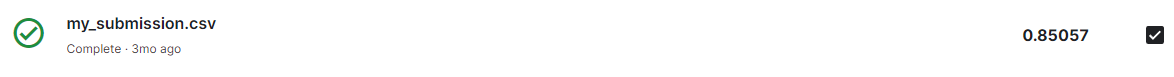